# Random Forest Classifier 🌲🌳

In [1]:
# imports
%cd ..
import numpy as np
from algorithms.ensemble.RandomForestClassifier import RandomForestClassifier
from algorithms.tree.DecisionTreeClassifier import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier as SklearnRandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

C:\Users\Karim\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


e:\KTorch


In [7]:
# Generate synthetic dataset
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape, X_test.shape

((350, 2), (150, 2))

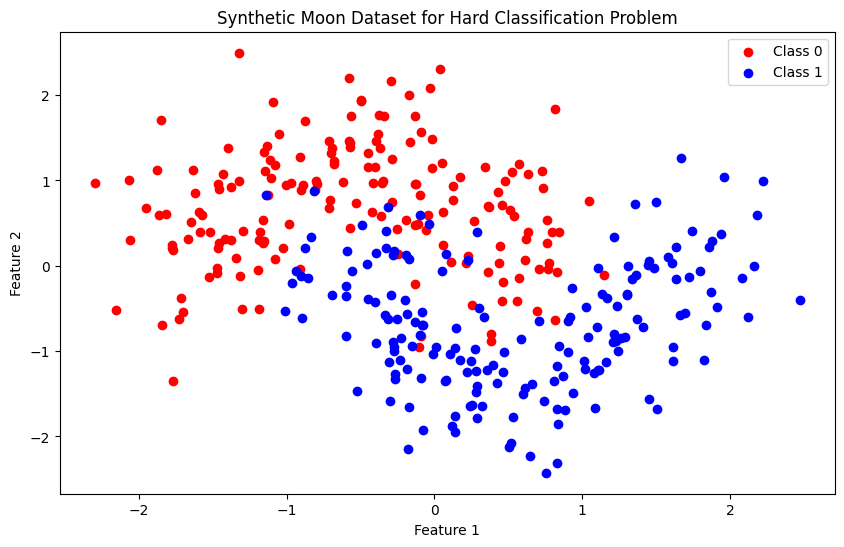

In [3]:
# Visualize the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Class 1')
plt.title('Synthetic Moon Dataset for Hard Classification Problem')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [4]:
# Let's try a decision tree classifier
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.8933333333333333

In [8]:
# Let's try a random forest classifier
forest = RandomForestClassifier(n_estimators=10, max_depth=5, max_features=1, max_samples=0.8)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

Random Forest Classifier fitted


0.8933333333333333

In [ ]:
# Let's compare with sklearn's random forest classifier
sklearn_forest = SklearnRandomForestClassifier(n_estimators=10, max_depth=3, max_features=1)
sklearn_forest.fit(X_train, y_train)
y_pred = sklearn_forest.predict(X_test)
accuracy_score(y_test, y_pred)

0.88

### Wine dataset

In [ ]:
from sklearn.datasets import load_wine

In [ ]:
data = load_wine()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape

(124, 13)

In [ ]:
# Let's try a decision tree classifier
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)  
tree.score(X_test, y_test)

0.9074074074074074

In [ ]:
# Let's try a random forest classifier
forest = RandomForestClassifier(n_estimators=10, max_depth=2, max_features=4, oob_score=True, max_samples=0.8)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

TypeError: expected a sequence of integers or a single integer, got '0.8'

In [ ]:
# Let's compare with sklearn's random forest classifier
sklearn_forest = SklearnRandomForestClassifier(n_estimators=10, max_depth=2, max_features=4)
sklearn_forest.fit(X_train, y_train)
sklearn_forest.score(X_test, y_test)

0.9814814814814815

The Random Forest classifier is able to do much better in a dataset with more features like the `load_wine` from sklearn.